## ***Coffee Quality Analysis and Prediction***

For coffee enthusiasts, taste reigns supreme. To ensure exceptional quality, every coffee bean undergoes rigorous testing by a panel of experts who evaluate key attributes such as flavor, acidity, sweetness, aroma, and more. In this project, I analyze this data and develop a predictive model to create detailed coffee profiles based on these assessment parameters, bringing precision and insight to the art of coffee appreciation.

### **Import Modules**

In [2]:
%matplotlib inline

# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from dateutil import parser

### **Accessing Data**

In [3]:
#Read data
df = pd.read_csv('E:\Code\AI\Coffee-Quality-Analysis-and-Prediction\df_arabica_clean.csv')
df

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\prant\AppData\Local\Temp\ipykernel_4416\1342455755.py:2: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv('E:\Code\AI\Coffee-Quality-Analysis-and-Prediction\df_arabica_clean.csv')


,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


## **Data Cleaning**

In [4]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

In [5]:
clean_df = df.drop(columns = ["Lot Number","ICO Number"])
clean_df

,Unnamed: 0,ID,Country of Origin,Farm Name,Mill,Company,Altitude,Region,Producer,Number of Bags,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,oklao coffee processing plant,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,La Montana Tarrazu MIll,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,Dry Mill,Ipanema Coffees,950,Sul de Minas,Ipanema Coffees,2240,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,Beneficio Atlantic Sébaco,Exportadora Atlantic S.A,1200,Matagalpa,Exportadora Atlantic S.A.,300,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,DRY MILL,Marubeni Corporation,1300,Bolaven Plateau,"LAO MINH TIEN COFFEE SOLE CO.,LTD",343,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila","Optimum Coffee, San Salvador, El Salvador",Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",Roselia Yglesias,1,...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [6]:
clean_df["Altitude"].unique()

array(['1700-1930', '1200', '1300', '1900', '1850-2100', '1668', '1250',
       '1400-1700', '1800-2200', '2000', '1900-2000', '1850', '1100',
       '1900-2100', '1570-1600', '850', '1500-1700', '1350', '1060',
       '600', '150-250', '668', '1950', '2150 - 2350', '1700', '650',
       '1600-1900', '300-500', '1000', '800', '1905', '150', '1600',
       '4700', '350-400', '230', '1750', '1654', '1400', '4895',
       '200-300', '700', '1450', '520', '1368', '1943', '400',
       '1300-1400', '2361', '1500', '2100', '1250-1350', '1500-1600',
       '1800', '1600-1750', '1411', '4895 A 5650', '400-600', nan,
       '200-400', '1470', '250-400', '250-300', '1200 - 1580',
       '1400 - 1900', '1280-1325', '300', '750', '1300-1500', '950',
       '1100-1200', '1390', '340', '1200 - 1300', '1650', '1280', '900',
       '165', '465', '640', '1340', '139', '1200-1350', '1040', '140',
       '1500-1950', '460', '500', '800-1200', '1350-1550', '1200~1600',
       '5400', '900-1000', '1574', '

In [7]:

clean_df.loc[clean_df['ID'] == 99, 'Altitude'] = 5273  # Impute value for ID 99
clean_df.loc[clean_df['ID'] == 105, 'Altitude'] = 1800  # Impute value for ID 105
clean_df.loc[clean_df['ID'] == 180, 'Altitude'] = 1400  # Impute value for ID 180


def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")  # Remove blank spaces
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

clean_df['Altitude'] = clean_df['Altitude'].apply(clean_altitude_range)

In [8]:
clean_df["Altitude"]

0      1815.0
1      1200.0
2      1300.0
3      1900.0
4      1975.0
        ...  
202     950.0
203    1200.0
204    1300.0
205    1200.0
206     975.0
Name: Altitude, Length: 207, dtype: float64

In [9]:
drop_column = ['Unnamed: 0','Mill','Farm Name',"Company","Producer","In-Country Partner","Owner","Certification Address","Certification Body","Certification Contact","Region"]

clean_df = clean_df.drop(columns=drop_column)


In [10]:
clean_df.isnull().sum()

ID                      0
Country of Origin       0
Altitude                0
Number of Bags          0
Bag Weight              0
Harvest Year            0
Grading Date            0
Variety                 6
Status                  0
Processing Method       5
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
Expiration              0
dtype: int64

In [11]:
# Drop rows where either 'Variety' or 'Processing Method' has null values
clean_df = clean_df.dropna(subset=['Variety', 'Processing Method'])

# Check if the null values have been dropped
clean_df.isnull().sum()


ID                      0
Country of Origin       0
Altitude                0
Number of Bags          0
Bag Weight              0
Harvest Year            0
Grading Date            0
Variety                 0
Status                  0
Processing Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
Expiration              0
dtype: int64

## **Feature Engineering**

In [12]:
clean_df["Harvest Year"]=clean_df["Harvest Year"].str.split('/').str[0].str.strip()

clean_df["Harvest Year"] = pd.to_datetime(clean_df["Harvest Year"],format='%Y')

clean_df["Expiration"] = clean_df["Expiration"].apply(parser.parse)

In [13]:
clean_df["Coffee Age"] = (clean_df["Expiration"]-clean_df["Harvest Year"]).dt.days
clean_df

,ID,Country of Origin,Altitude,Number of Bags,Bag Weight,Harvest Year,Grading Date,Variety,Status,Processing Method,...,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Coffee Age
0,0,Colombia,1815.0,1,35 kg,2021-01-01,"September 21st, 2022",Castillo,Completed,Double Anaerobic Washed,...,8.58,0.0,89.33,11.8,0,0,green,3,2023-09-21,993
1,1,Taiwan,1200.0,1,80 kg,2021-01-01,"November 15th, 2022",Gesha,Completed,Washed / Wet,...,8.50,0.0,87.58,10.5,0,0,blue-green,0,2023-11-15,1048
2,2,Laos,1300.0,19,25 kg,2021-01-01,"November 15th, 2022",Java,Completed,Semi Washed,...,8.33,0.0,87.42,10.4,0,0,yellowish,2,2023-11-15,1048
3,3,Costa Rica,1900.0,1,22 kg,2022-01-01,"September 21st, 2022",Gesha,Completed,Washed / Wet,...,8.25,0.0,87.17,11.8,0,0,green,0,2023-09-21,628
4,4,Colombia,1975.0,2,24 kg,2022-01-01,"March 6th, 2023",Red Bourbon,Completed,"Honey,Mossto",...,8.25,0.0,87.08,11.6,0,2,yellow-green,2,2024-03-05,794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,Brazil,950.0,2240,60 kg,2022-01-01,"February 2nd, 2023",Mundo Novo,Completed,Natural / Dry,...,7.08,0.0,80.08,11.4,0,0,green,4,2024-02-02,762
203,203,Nicaragua,1200.0,300,30 kg,2022-01-01,"March 3rd, 2023",SHG,Completed,Natural / Dry,...,7.08,0.0,80.00,10.4,0,2,green,12,2024-03-02,791
204,204,Laos,1300.0,343,60 kg,2021-01-01,"November 11th, 2022",Catimor,Completed,Washed / Wet,...,7.00,0.0,79.67,11.6,0,9,green,11,2023-11-11,1044
205,205,El Salvador,1200.0,1,2 kg,2023-01-01,"March 8th, 2023",Maragogype,Completed,Natural / Dry,...,6.83,0.0,78.08,11.0,0,12,bluish-green,13,2024-03-07,431


In [14]:
clean_df["Altitude"].unique()

max = clean_df["Altitude"].max()
min = clean_df["Altitude"].min()

print(max,min)

5400.0 139.0


In [15]:
bins = [0,601,1201,2801]
labels = ["Lowland","Mid-Altitude","Highlands"]

clean_df["Altitude_Category"] = pd.cut(clean_df["Altitude"],bins = bins,labels = labels)

altitude_cat = clean_df[["Altitude","Altitude_Category"]]
 
altitude_cat

,Altitude,Altitude_Category
0,1815.0,Highlands
1,1200.0,Mid-Altitude
2,1300.0,Highlands
3,1900.0,Highlands
4,1975.0,Highlands
...,...,...
202,950.0,Mid-Altitude
203,1200.0,Mid-Altitude
204,1300.0,Highlands
205,1200.0,Mid-Altitude


## **Exploratory Data Analysis**

In [16]:
clean_df.describe()

,ID,Altitude,Number of Bags,Harvest Year,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,...,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects,Expiration,Coffee Age
count,197.000000,197.000000,197.000000,197,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,...,197.0,197.000000,197.0,197.000000,197.000000,197.000000,197.000000,197.000000,197,197.000000
mean,102.964467,1318.058376,152.868020,2021-05-31 01:35:01.522842624,7.720406,7.746142,7.600558,7.688528,7.642944,7.645888,...,10.0,7.676904,0.0,83.709848,10.698985,0.126904,0.690355,2.263959,2023-11-15 22:24:58.477157376,898.868020
min,0.000000,139.000000,1.000000,2017-01-01 00:00:00,6.500000,6.750000,6.670000,6.830000,6.830000,6.670000,...,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000,2023-05-11 00:00:00,431.000000
25%,53.000000,1000.000000,1.000000,2021-01-01 00:00:00,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,...,10.0,7.500000,0.0,82.580000,10.000000,0.000000,0.000000,0.000000,2023-09-19 00:00:00,761.000000
50%,103.000000,1340.000000,10.000000,2021-01-01 00:00:00,7.670000,7.750000,7.580000,7.670000,7.670000,7.670000,...,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000,2023-11-15 00:00:00,886.000000
75%,154.000000,1600.000000,275.000000,2022-01-01 00:00:00,7.920000,7.920000,7.750000,7.830000,7.750000,7.750000,...,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000,2024-01-06 00:00:00,1048.000000
max,206.000000,5400.000000,2240.000000,2023-01-01 00:00:00,8.580000,8.500000,8.420000,8.580000,8.250000,8.420000,...,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000,2024-04-27 00:00:00,2487.000000
std,59.737382,732.934654,247.500985,NaN,0.291451,0.280206,0.277807,0.258832,0.233753,0.258036,...,0.0,0.309621,0.0,1.739459,1.257954,0.588267,1.714452,2.969465,NaN,236.191903


In [17]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, 0 to 206
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    197 non-null    int64         
 1   Country of Origin     197 non-null    object        
 2   Altitude              197 non-null    float64       
 3   Number of Bags        197 non-null    int64         
 4   Bag Weight            197 non-null    object        
 5   Harvest Year          197 non-null    datetime64[ns]
 6   Grading Date          197 non-null    object        
 7   Variety               197 non-null    object        
 8   Status                197 non-null    object        
 9   Processing Method     197 non-null    object        
 10  Aroma                 197 non-null    float64       
 11  Flavor                197 non-null    float64       
 12  Aftertaste            197 non-null    float64       
 13  Acidity               197

C:\Users\prant\AppData\Local\Temp\ipykernel_4416\3595560047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_coffee_distr, x="Country of Origin", y="Variety", palette='viridis')


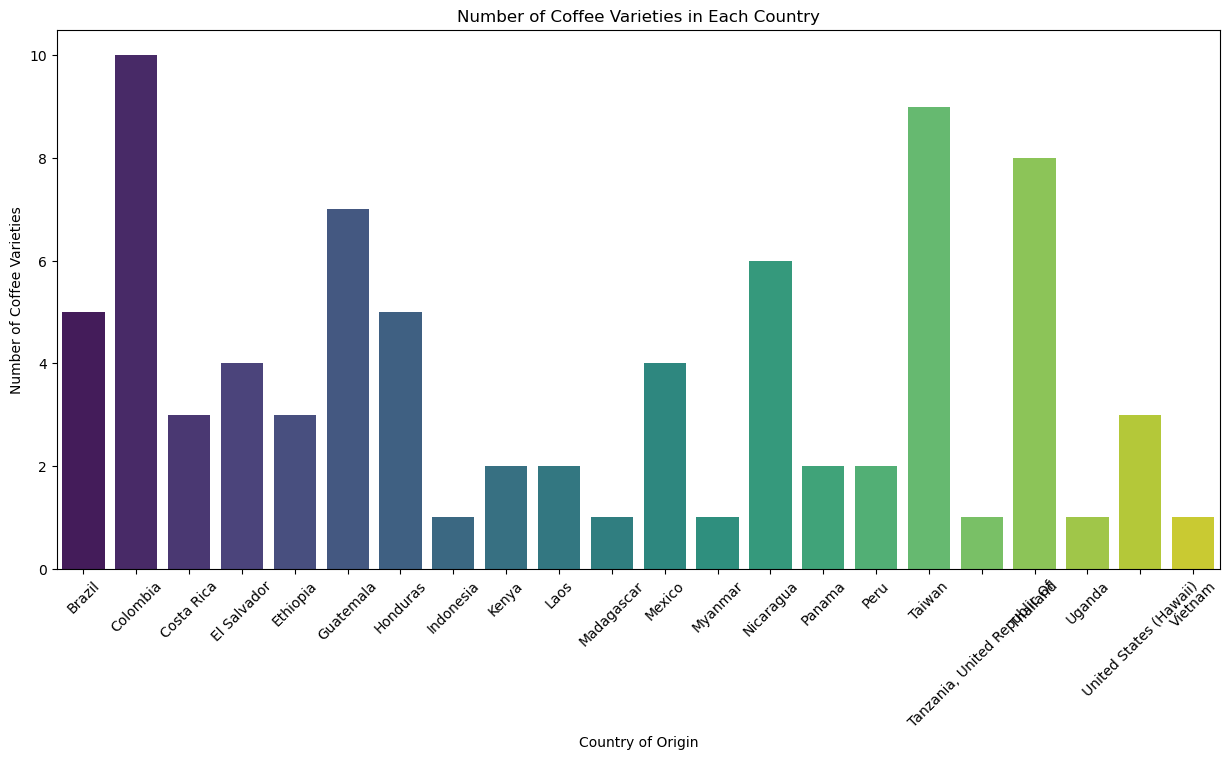

In [18]:
# Create a visualization for the number of coffee varieties in each country
data_coffee_distr = pd.DataFrame(clean_df.groupby("Country of Origin")["Variety"].nunique().reset_index())

# Create the bar plot
plt.figure(figsize=(15,7))
plt.title("Number of Coffee Varieties in Each Country")
sns.barplot(data=data_coffee_distr, x="Country of Origin", y="Variety", palette='viridis')
plt.xlabel('Country of Origin')
plt.ylabel('Number of Coffee Varieties')
plt.xticks(rotation=45)

# Display the plot
plt.show()


C:\Users\prant\AppData\Local\Temp\ipykernel_4416\3313271719.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_coffee_alt = pd.DataFrame(clean_df.groupby("Altitude_Category")["Variety"].nunique().reset_index())
C:\Users\prant\AppData\Local\Temp\ipykernel_4416\3313271719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_coffee_alt, x="Altitude_Category", y="Variety", palette='viridis')


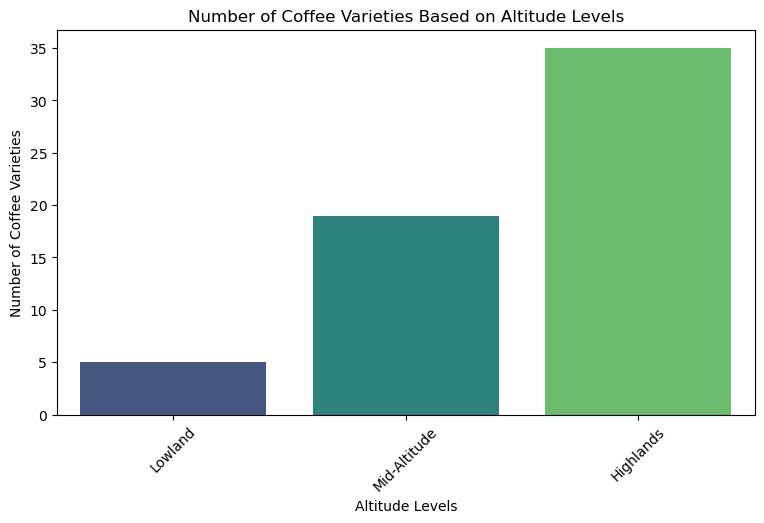

In [19]:
data_coffee_alt = pd.DataFrame(clean_df.groupby("Altitude_Category")["Variety"].nunique().reset_index())

# Create the graph in the form of a bar plot
plt.figure(figsize=(9, 5))
plt.title("Number of Coffee Varieties Based on Altitude Levels")
sns.barplot(data=data_coffee_alt, x="Altitude_Category", y="Variety", palette='viridis')
plt.xlabel('Altitude Levels')
plt.ylabel('Number of Coffee Varieties')
plt.xticks(rotation=45)

# Display the graph
plt.show()


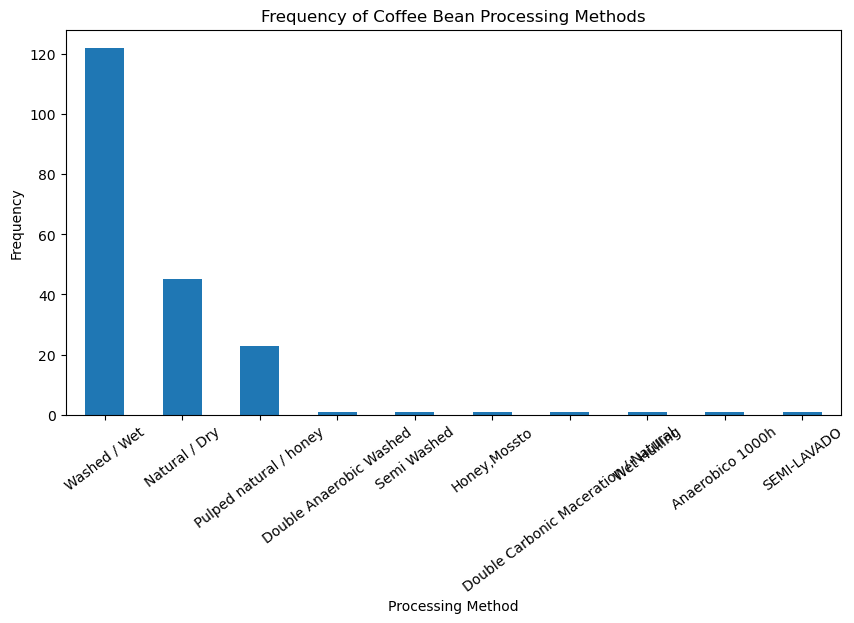

In [20]:
# Check the number of data points for each processing method
freq_process = clean_df["Processing Method"].value_counts()

if freq_process.empty:
    print("No data available for 'Processing Method'. Please check the dataset.")
else:
    # Create a bar plot to show the frequency of coffee bean processing methods
    plt.figure(figsize=(10, 5))
    plt.title("Frequency of Coffee Bean Processing Methods")
    freq_process.plot(kind='bar')
    plt.xticks(rotation=37)
    plt.xlabel("Processing Method")
    plt.ylabel("Frequency")
    plt.show()


In [21]:
coffee_var_points = clean_df[["Variety","Total Cup Points"]]
mean_var_points = coffee_var_points.groupby("Variety")["Total Cup Points"].mean()
mean_var_points = pd.DataFrame(mean_var_points)
mean_var_points

,Total Cup Points
Variety,
"BOURBON, CATURRA Y CATIMOR",83.830000
Bourbon,83.754118
Bourbon Sidra,83.750000
"Bourbon, Catimor, Caturra, Typica",82.670000
Castillo,89.330000
Castillo and Colombia blend,84.330000
"Castillo,Caturra,Bourbon",80.420000
Catimor,82.708000
"Catimor,Catuai,Caturra,Bourbon",83.670000


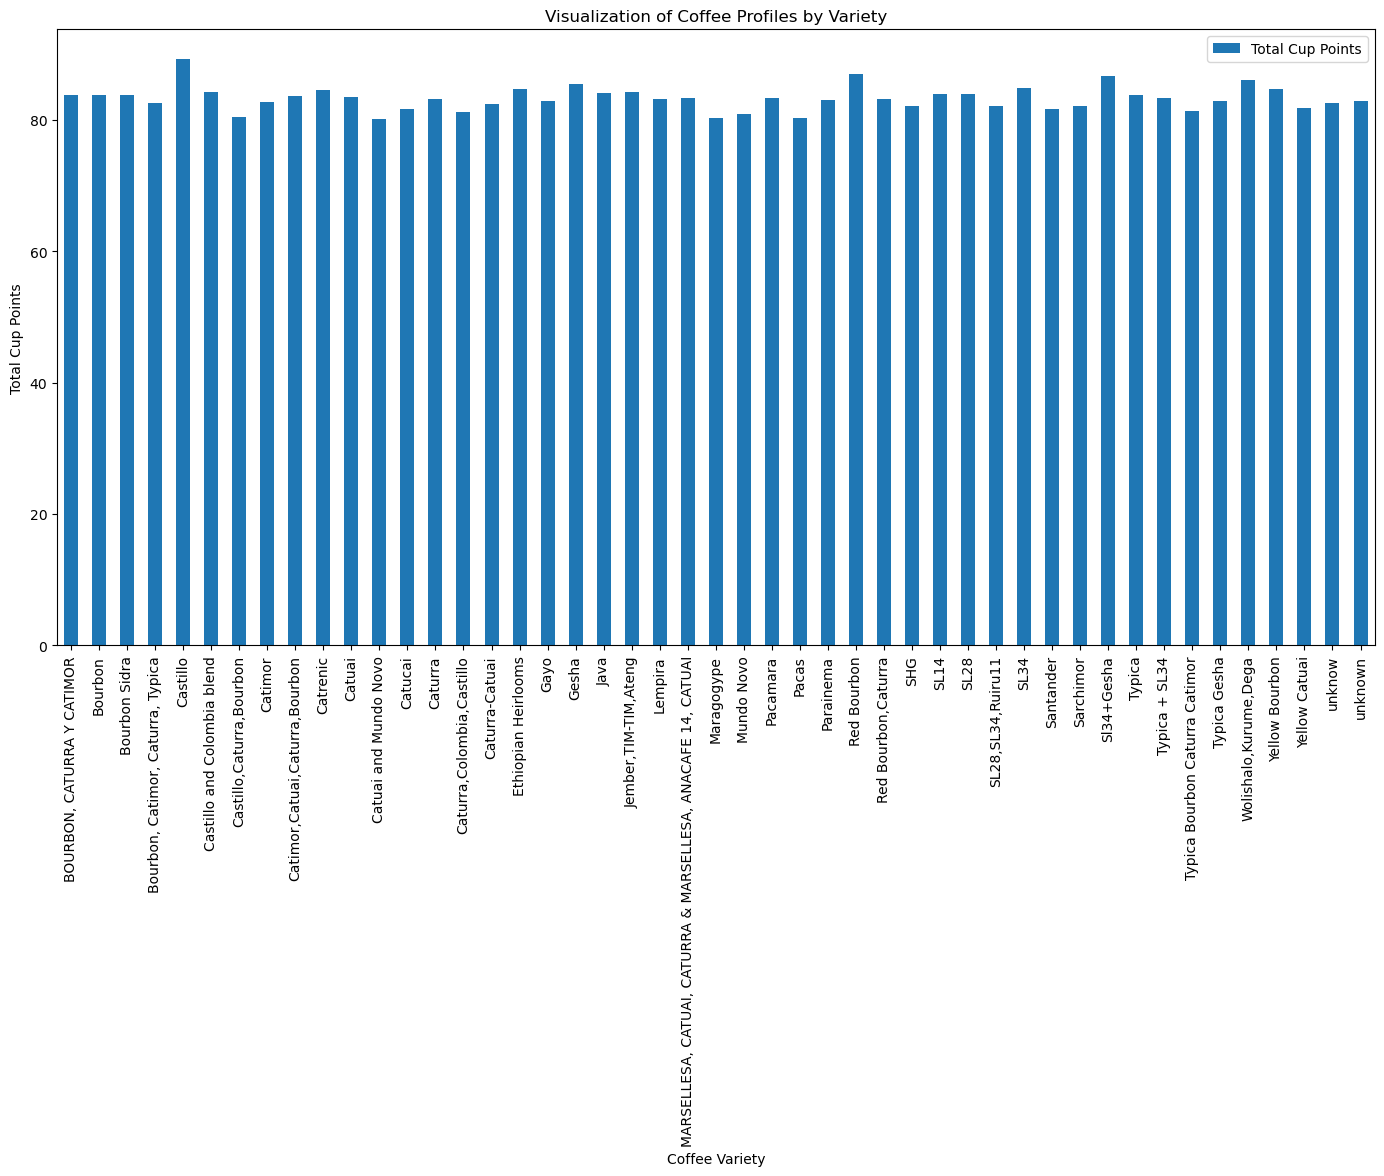

In [22]:
# Visualizing data
mean_var_points.plot(kind='bar', figsize=(17, 8))
plt.title("Visualization of Coffee Profiles by Variety")
plt.xticks(rotation=90)
plt.xlabel("Coffee Variety")
plt.ylabel("Total Cup Points")
plt.show()


In [23]:
from scipy import stats

# Perform the Kolmogorov-Smirnov Normality Test. Create the function
def ks_test(dataset,column,alpha):
    statss, p_value = stats.shapiro(dataset[column])
    print(f'P value: {p_value}')
    print(f'Statistic: {statss}')
    if p_value > alpha:
        print(f"Data in column {column} follows a normal distribution")
    else:
        print(f"Data in column {column} does not follow a normal distribution")


In [24]:
ks_test(clean_df,"Sweetness",0.05)
ks_test(clean_df,"Acidity",0.05)
ks_test(clean_df,"Balance", 0.05)
ks_test(clean_df,"Uniformity", 0.05)
ks_test(clean_df,"Body", 0.05)
ks_test(clean_df,"Clean Cup", 0.05)
ks_test(clean_df,"Flavor", 0.05)
ks_test(clean_df,"Aroma", 0.05)
ks_test(clean_df,"Aftertaste", 0.05)


P value: 1.0
Statistic: 1.0
Data in column Sweetness follows a normal distribution
P value: 0.024033249504766374
Statistic: 0.9839529545158822
Data in column Acidity does not follow a normal distribution
P value: 0.009355425607495603
Statistic: 0.9811144204694566
Data in column Balance does not follow a normal distribution
P value: 6.079553105358504e-30
Statistic: 0.07146477756709191
Data in column Uniformity does not follow a normal distribution
P value: 0.004619404631214641
Statistic: 0.978928102552127
Data in column Body does not follow a normal distribution
P value: 1.0
Statistic: 1.0
Data in column Clean Cup follows a normal distribution
P value: 0.03457190151306842
Statistic: 0.9850271870794811
Data in column Flavor does not follow a normal distribution
P value: 0.006650120090241321
Statistic: 0.9800645331126776
Data in column Aroma does not follow a normal distribution
P value: 0.00869031825852805
Statistic: 0.9808887238262233
Data in column Aftertaste does not follow a normal d

c:\Users\prant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


### **Correlation Analysis of Parameters Determining Coffee Quality (Total Cup Points)**

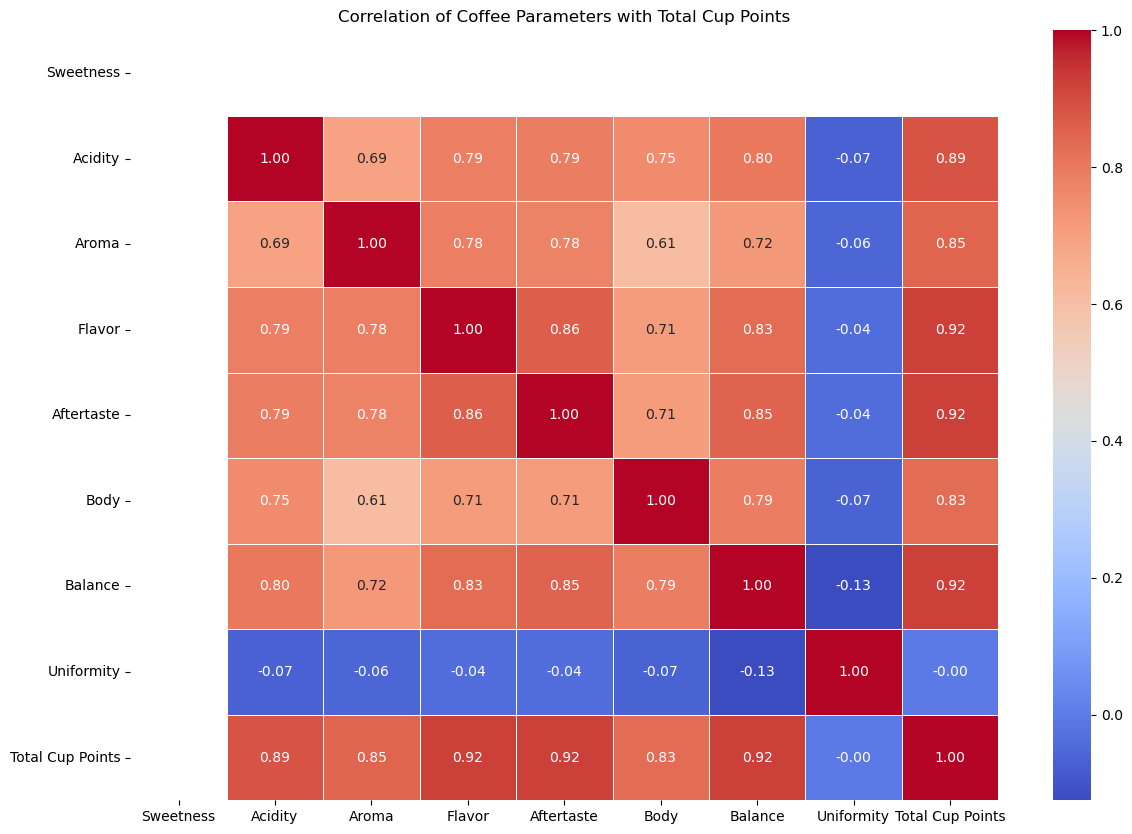

In [25]:
# Perform correlation analysis on numerical parameters and total cup points (Coffee Rating)
data_correl = {
    "Sweetness": clean_df["Sweetness"].copy(),
    "Acidity": clean_df["Acidity"].copy(),
    "Aroma": clean_df["Aroma"].copy(),
    "Flavor": clean_df["Flavor"].copy(),
    "Aftertaste": clean_df["Aftertaste"].copy(),
    "Body": clean_df["Body"].copy(),
    "Balance": clean_df["Balance"].copy(),
    "Uniformity": clean_df["Uniformity"].copy(),
    "Total Cup Points": clean_df["Total Cup Points"].copy()
}

# Create a dataframe
dataframe_correl = pd.DataFrame(data_correl)

# Perform Pearson correlation
correlation_matrix = dataframe_correl.corr(method='spearman')

# Create the visualization
plt.figure(figsize=(14,10))
plt.title('Correlation of Coffee Parameters with Total Cup Points')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.show()


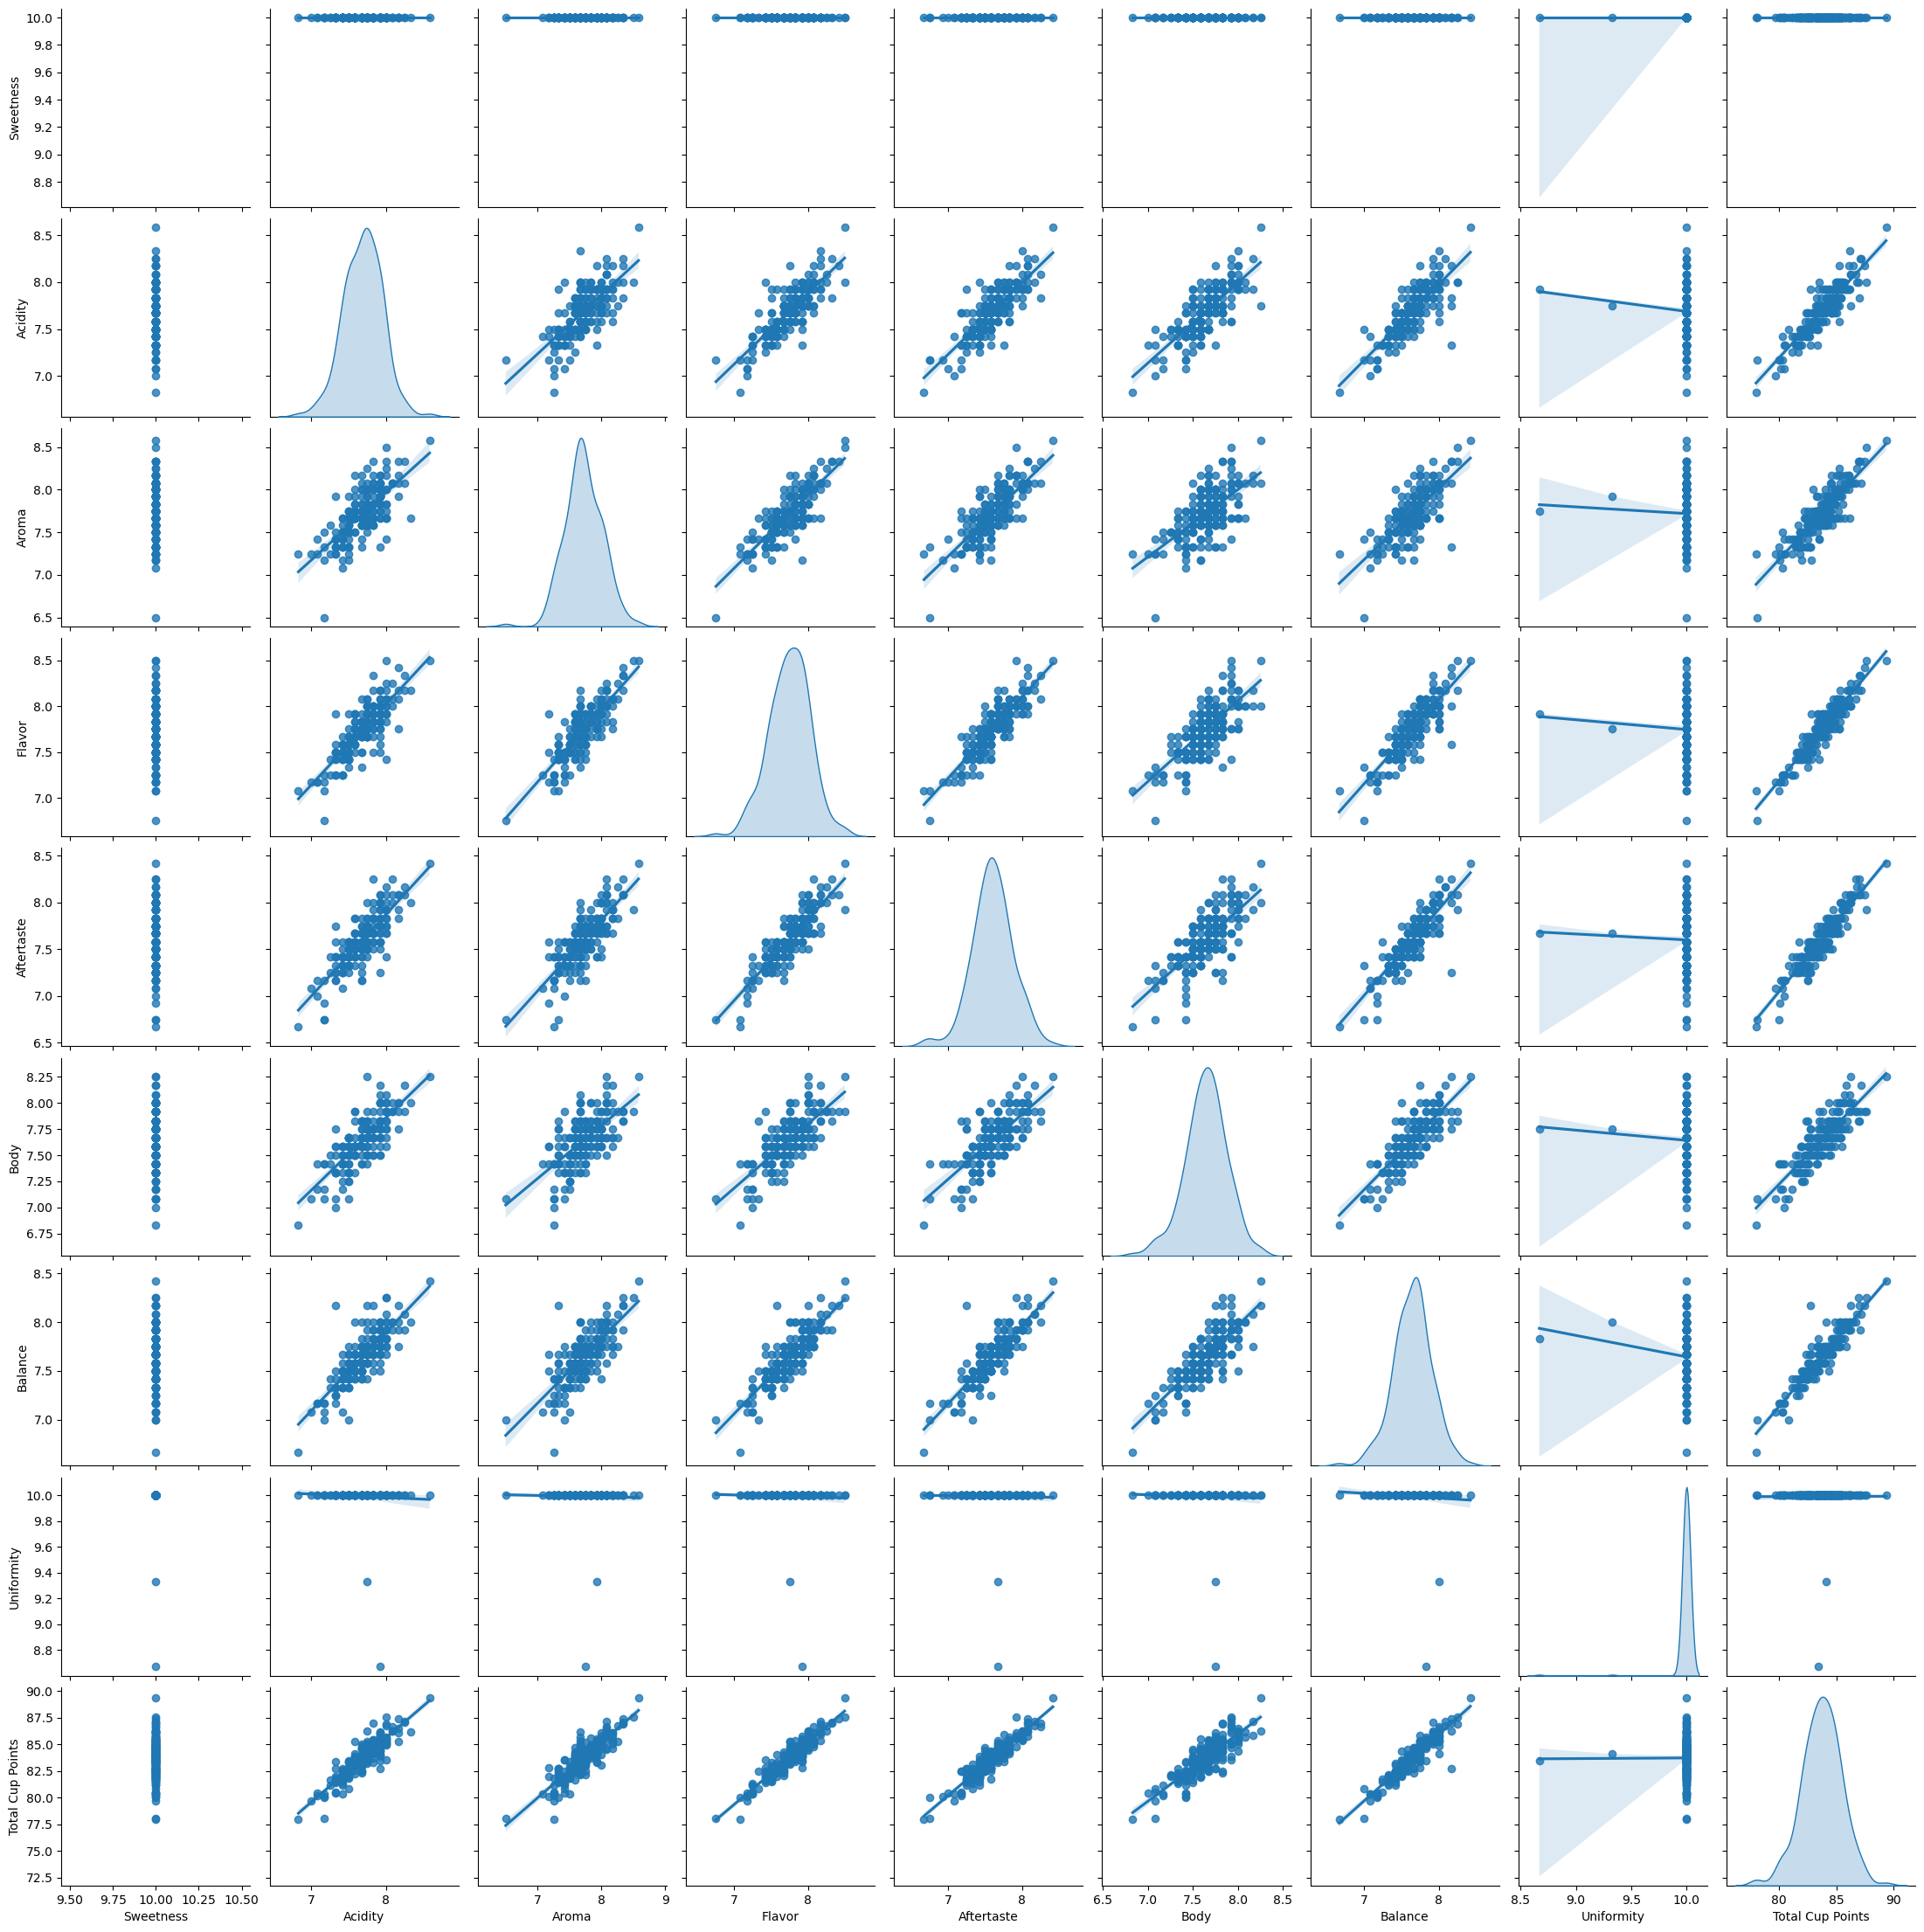

In [26]:
# Create a pairplot for all combinations of the data
sns.pairplot(dataframe_correl, kind='reg', diag_kind="kde")
plt.show()

## **Principal Component Analysis (PCA)**

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
# Initialize scaler
scaler = StandardScaler()
numeric_data = ["Sweetness", "Aroma", "Flavor", "Acidity", "Total Cup Points", "Body", "Balance", "Aftertaste", "Uniformity", "Clean Cup"]
data_scaled = clean_df[numeric_data].copy()
data_scaled = scaler.fit_transform(data_scaled)

# Perform PCA on the numerical data
pca = PCA()
principal_components = pca.fit_transform(data_scaled)


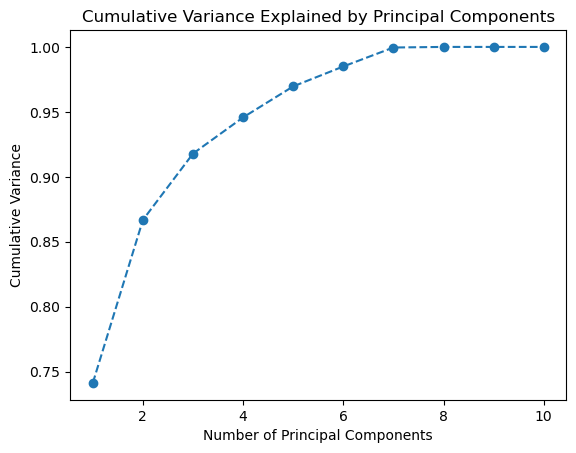

In [29]:
# Visualize the PCA results
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Cumulative Variance Explained by Principal Components")
plt.xlabel('Number of Principal Components')
plt.ylabel("Cumulative Variance")
plt.show()


In [30]:
# Select n components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(data_scaled)

# Create DataFrame to hold the principal component values
principal_df = pd.DataFrame(data=principal_components,
                            columns=["principal components 1", 'principal components 2', "principal components 3"])
principal_df


,principal components 1,principal components 2,principal components 3
0,7.904844,0.255479,0.000890
1,5.114175,0.229040,-1.090693
2,5.105407,0.219278,-0.639415
3,4.879812,0.182911,0.792207
4,4.643408,0.243213,-0.652724
...,...,...,...
192,-5.062026,-0.043785,0.696865
193,-5.245246,-0.053063,0.511935
194,-5.731900,0.012632,-0.731310
195,-7.935519,-0.177269,1.545343


In [31]:

print(pca.explained_variance_ratio_)

[0.7412972  0.12553055 0.05104329]


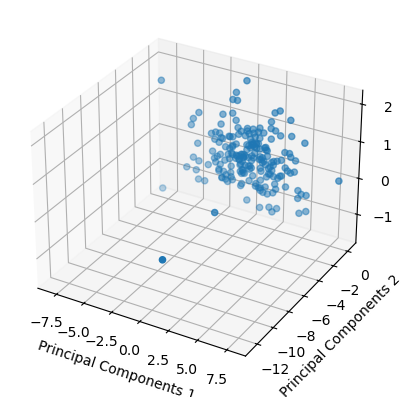

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(principal_df["principal components 1"], principal_df["principal components 2"], principal_df["principal components 3"])

ax.set_xlabel('Principal Components 1')
ax.set_ylabel("Principal Components 2")
ax.set_zlabel("Principal Components 3")
plt.show()

## **Creation of Machine Learning Model**

The analysis process has been completed! Next, we will use the existing data to create a machine learning model to predict the Total Cup Points based on the features present in the dataset. The type of machine learning we will use is regression. We will predict the Total Cup Points, which is the total score from the previous coffee evaluation parameters. Why regression? Because the Total Cup Points is a floating-point scale ranging from 0.0 to 100.0. It would be difficult to use classification since classification can only be performed when the number of categories is discrete (integer values).

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import xgboost as xgb

### **Splitting the Training Data and Test Data, as well as Scaling** 

In [34]:
x = principal_df  # The dataset features reduced with PCA
y = clean_df["Total Cup Points"].copy()  # The target variable whose value we want to predict

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)  # Standardizing the features

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.2)


In [35]:
# Initialization
def predict_n_eval(x_test, y_test, model):
        y_pred = model.predict(x_test)

        # Counting MSE (Mean Squared Error)
        MSE = mean_squared_error(y_test, y_pred)

        # Counting MAE (Mean Absolute Error)
        MAE = mean_absolute_error(y_test, y_pred)

        # Counting MAPE (Mean Absolute Percentage Error)
        MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        # Counting R2 SCORE
        r2 = r2_score(y_test, y_pred)

        return y_pred, MSE, MAE, MAPE, r2


### **Random Forest Model**

In [36]:
 # Inisiasi Model Random Forest
rf_model = RandomForestRegressor(n_estimators = 300,random_state = 42) 
rf_model.fit(x_train,y_train)

rf_pred,mse_rf,mae_rf,mape_rf,r2_rf = predict_n_eval(x_test,y_test,rf_model)

In [37]:
# Unpack the results of prediction and evaluation
print(f"MAPE value of Random Forest is: {mape_rf}")
print(f"MAE value of Random Forest is: {mae_rf}")
print(f"MSE value of Random Forest model is: {mse_rf}")
print(f"R2 score value of Random Forest model is: {r2_rf}")


MAPE value of Random Forest is: 0.278377025473872
MAE value of Random Forest is: 0.2297241666665947
MSE value of Random Forest model is: 0.30478305547218604
R2 score value of Random Forest model is: 0.9332215053502797


In [38]:
x_nonpca = clean_df[numeric_data]
y_nonpca = clean_df["Total Cup Points"]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train_nonpca,x_test_nonpca,y_train_nonpca,y_test_nonpca = train_test_split(x_scaled,y,test_size=0.2)

In [39]:
# Initialize the model
rf_model_nonpca = RandomForestRegressor(n_estimators=300, random_state=42)
rf_model_nonpca.fit(x_train_nonpca, y_train_nonpca)

# Predict and evaluate the model's performance
y_pred_non_rf, msenon_rf, maenon_rf, mapenon_rf, r2non_rf = predict_n_eval(x_test_nonpca, y_test_nonpca, rf_model_nonpca)

# Print the evaluation metrics
print(f"Random Forest MAPE value: {mapenon_rf}")
print(f"Random Forest MAE value: {maenon_rf}")
print(f"Random Forest MSE value: {msenon_rf}")
print(f"Random Forest R2 score value: {r2non_rf}")


Random Forest MAPE value: 0.12860494864407052
Random Forest MAE value: 0.10773749999997903
Random Forest MSE value: 0.03819089869444762
Random Forest R2 score value: 0.9732362000822393


### **XGBoost Regression**

In [40]:
# Initialize the XGBoost model
xgboost = xgb.XGBRegressor(objective='reg:squarederror',
                           learning_rate=0.1,
                           n_estimators=300,
                           random_state=42,
                           reg_lambda=2,
                           verbosity=2)

# Train the model
xgboost.fit(x_train, y_train)

# Predict and evaluate the performance of the model
y_pred_xgb_pca, mse_xgb_pca, mae_xgb_pca, mape_xgb_pca, r2_xgb_pca = predict_n_eval(x_test, y_test, xgboost)

# Print the evaluation metrics
print(f"MAPE value of XGB with PCA data: {mape_xgb_pca}")
print(f"MAE value of XGB with PCA data: {mae_xgb_pca}")
print(f"MSE value of XGB model with PCA data: {mse_xgb_pca}")
print(f"R2 score value of XGB model with PCA data: {r2_xgb_pca}")


MAPE value of XGB with PCA data: 0.26078246633383895
MAE value of XGB with PCA data: 0.21557826232910174
MSE value of XGB model with PCA data: 0.23089633999429182
R2 score value of XGB model with PCA data: 0.9494102125163716


In [41]:
# Initialize and fit the XGBoost model
xgboost.fit(x_train_nonpca, y_train_nonpca)

# Predict and evaluate the performance of the model
y_pred_xgb_nonpca, mse_xgb_nonpca, mae_xgb_nonpca, mape_xgb_nonpca, r2_xgb_nonpca = predict_n_eval(x_test_nonpca, y_test_nonpca, xgboost)

# Print the evaluation metrics
print(f"MAPE value of XGB with non-PCA data: {mape_xgb_nonpca}")
print(f"MAE value of XGB with non-PCA data: {mae_xgb_nonpca}")
print(f"MSE value of XGB model with non-PCA data: {mse_xgb_nonpca}")
print(f"R2 score value of XGB model with non-PCA data: {r2_xgb_nonpca}")


MAPE value of XGB with non-PCA data: 0.13287526846715447
MAE value of XGB with non-PCA data: 0.11146807098388685
MSE value of XGB model with non-PCA data: 0.03373507798616542
R2 score value of XGB model with non-PCA data: 0.9763587946789257


### **Linear Regression**

In [42]:
lr = LinearRegression()

# Fit the model to PCA data
lr.fit(x_train, y_train)

# Predict and evaluate the linear regression model
y_pred_lr_pca, mse_lr_pca, mae_lr_pca, mape_lr_pca, r2_lr_pca = predict_n_eval(x_test, y_test, lr)

# Print the evaluation metrics
print(f"MAPE value of linear regression with PCA data: {mape_lr_pca}")
print(f"MAE value of linear regression with PCA data: {mae_lr_pca}")
print(f"MSE value of linear regression model with PCA data: {mse_lr_pca}")
print(f"R2 score value of linear regression model with PCA data: {r2_lr_pca}")


MAPE value of linear regression with PCA data: 0.0775741496493142
MAE value of linear regression with PCA data: 0.0650250419258395
MSE value of linear regression model with PCA data: 0.006132698590986524
R2 score value of linear regression model with PCA data: 0.9986563151307343


In [43]:
# Fit the model to non-PCA data
lr.fit(x_train_nonpca, y_train_nonpca)

# Predict and evaluate the linear regression model
y_pred_lr_nonpca, mse_lr_nonpca, mae_lr_nonpca, mape_lr_nonpca, r2_lr_nonpca = predict_n_eval(x_test_nonpca, y_test_nonpca, lr)

# Print the evaluation metrics
print(f"MAPE value of linear regression with non-PCA data: {mape_lr_nonpca}")
print(f"MAE value of linear regression with non-PCA data: {mae_lr_nonpca}")
print(f"MSE value of linear regression model with non-PCA data: {mse_lr_nonpca}")
print(f"R2 score value of linear regression model with non-PCA data: {r2_lr_nonpca}")


MAPE value of linear regression with non-PCA data: 0.09640998675195699
MAE value of linear regression with non-PCA data: 0.08105287866709361
MSE value of linear regression model with non-PCA data: 0.019983713062700525
R2 score value of linear regression model with non-PCA data: 0.9859956137114465


In [44]:
compare_model_data = {
    'PCA' : pd.Series([mape_rf,mape_xgb_pca,mape_lr_pca],
                     index = ['Random Forest','XGBoost','Linear Regression']),
    'Non-PCA': pd.Series([mapenon_rf,mape_xgb_nonpca,mape_lr_nonpca],
                        index = ['Random Forest','XGBoost','Linear Regression'])
}

compare_model_df = pd.DataFrame(compare_model_data)
compare_model_df

,PCA,Non-PCA
Random Forest,0.278377,0.128605
XGBoost,0.260782,0.132875
Linear Regression,0.077574,0.096410


### **Visualization of Predicted Data with Actual Values**

In [45]:

data_pred_act_pca = {
     'data_test' : y_test,
     'Random Forest': rf_pred,
     'XGBoost': y_pred_xgb_pca,
     'Linear Regression': y_pred_lr_pca
    
}
df_pred_act_pca = pd.DataFrame(data_pred_act_pca).reset_index()
df_pca_long = pd.melt(df_pred_act_pca,id_vars='data_test',value_vars = ['Random Forest','XGBoost','Linear Regression'],
                          var_name = 'Model',value_name='predicted')
df_pca_long


,data_test,Model,predicted
0,86.50,Random Forest,86.627300
1,83.83,Random Forest,84.150000
2,83.42,Random Forest,83.242667
3,84.50,Random Forest,84.451733
4,86.08,Random Forest,86.145167
...,...,...,...
115,81.75,Linear Regression,81.771881
116,82.17,Linear Regression,82.237918
117,84.83,Linear Regression,84.692724
118,83.33,Linear Regression,83.370124


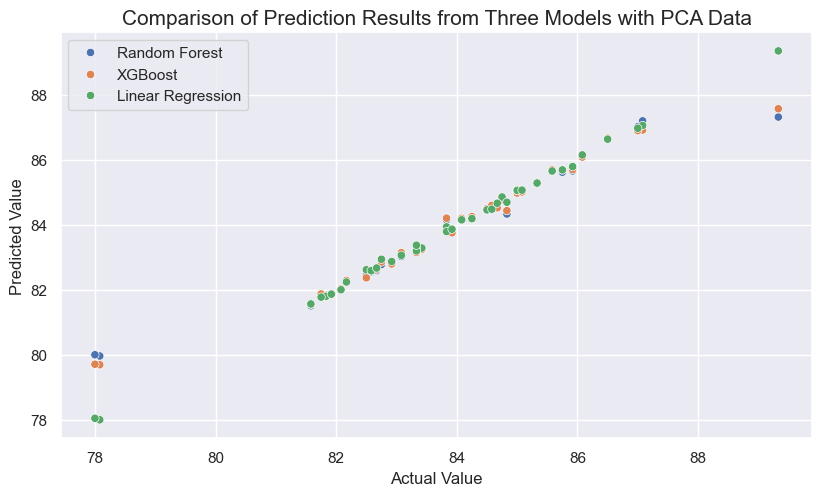

In [46]:
sns.set_theme(rc={'figure.figsize':(9.7,5.27)})
sns.scatterplot(data=df_pca_long, x='data_test', y='predicted', hue = 'Model')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Comparison of Prediction Results from Three Models with PCA Data', fontsize=15)
plt.legend()
plt.show()


In [47]:

data_pred_act_nonpca = {
     'data_test' : y_test,
     'Random Forest': y_pred_non_rf,
     'XGBoost': y_pred_xgb_nonpca,
     'Linear Regression': y_pred_lr_nonpca
    
}
df_pred_act_nonpca = pd.DataFrame(data_pred_act_nonpca).reset_index()
df_nonpca_long = pd.melt(df_pred_act_pca,id_vars='data_test',value_vars = ['Random Forest','XGBoost','Linear Regression'],
                          var_name = 'Model',value_name='predicted')
df_nonpca_long

,data_test,Model,predicted
0,86.50,Random Forest,86.627300
1,83.83,Random Forest,84.150000
2,83.42,Random Forest,83.242667
3,84.50,Random Forest,84.451733
4,86.08,Random Forest,86.145167
...,...,...,...
115,81.75,Linear Regression,81.771881
116,82.17,Linear Regression,82.237918
117,84.83,Linear Regression,84.692724
118,83.33,Linear Regression,83.370124


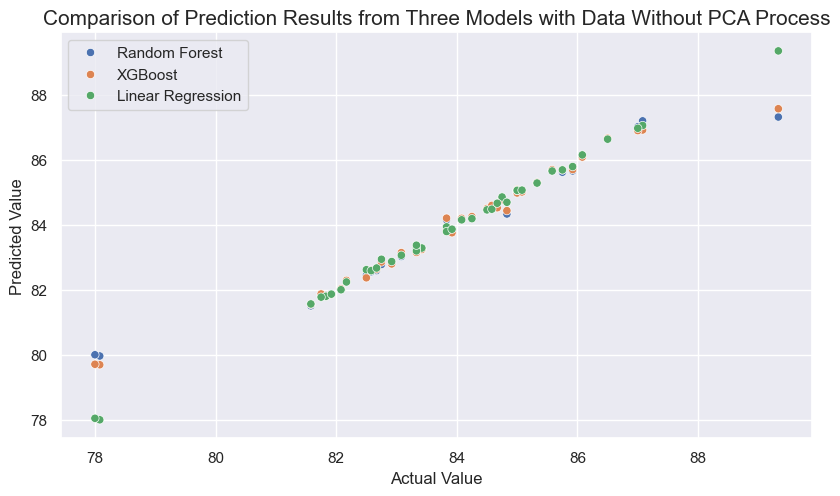

In [48]:
sns.set_theme(rc={'figure.figsize':(9.7,5.27)})
sns.scatterplot(data=df_nonpca_long, x='data_test', y='predicted', hue = 'Model')
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Comparison of Prediction Results from Three Models with Data Without PCA Process', fontsize=15)
plt.legend()
plt.show()
